# FIT5202 Assignment 2A : Building Models to Predict Loan Default

## Table of Contents
*  
    * [Part 1 : Data Loading, Transformation and Exploration](#part-1)
    * [Part 2 : Feature extraction and ML training](#part-2)
    * [Part 3 : Applicant Segmentation and Knowledge sharing with K-Mean](#part-3)
    * [Part 4 : Data Ethics, Privacy, and Security](#part-4)
 
Please add code/markdown cells as you need.

# Part 1: Data Loading, Transformation and Exploration <a class="anchor" name="part-1"></a>
## 1.1 Data Loading
In this section, you need to load the given datasets into PySpark DataFrames and use DataFrame functions to process the data, usage of Spark SQL is discouraged. You are allowed to use third-party libraries to format the output. For plotting, different visualisation packages can be used, please ensure that you have included instructions to install the additional packages and the installation will be successful in the provided docker container(in case your marker needs to clear the notebook and rerun it).

### 1.1.1 Data Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkSession. For creating the SparkSession, you need to use a SparkConf object to configure the Spark app with a proper application name, to ensure the maximum partition size does not exceed 20MB, and to run locally with 4 CPU cores on your machine. (2%)

In [1]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[4]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Assignment 2A"

# Configure Spark with a maximum partition size of 20MB
spark_conf = SparkConf().setMaster(master).setAppName(app_name).set("spark.sql.files.maxPartitionBytes", "20MB")

# Import SparkSession and SparkContext classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# Create a SparkSession with the specified configuration
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
spark.sparkContext.setLogLevel('ERROR')

1.1.2 Write code to define the schemas for previous_application and application_data, following the data types suggested in the metadata file. (3%)

In [2]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType

# Define schema for previous_application
previous_application_schema = StructType([
    StructField("id", IntegerType(), True),
    StructField("id_app", IntegerType(), True),
    StructField("contract_type", StringType(), True),
    StructField("amt_annuity", DoubleType(), True),
    StructField("amt_application", DoubleType(), True),
    StructField("amt_credit", DoubleType(), True),
    StructField("amt_down_payment", DoubleType(), True),
    StructField("amt_goods_price", DoubleType(), True),
    StructField("hour_appr_process_start", IntegerType(), True),
    StructField("rate_down_payment", DoubleType(), True),
    StructField("rate_interest_primary", DoubleType(), True),
    StructField("rate_interest_privilege", DoubleType(), True),
    StructField("name_cash_loan_purpose", StringType(), True),
    StructField("name_contract_status", StringType(), True),
    StructField("days_decision", IntegerType(), True),
    StructField("name_payment_type", StringType(), True),
    StructField("code_reject_reason", StringType(), True),
    StructField("name_type_suite", StringType(), True),
    StructField("name_client_type", StringType(), True),
    StructField("name_goods_category", StringType(), True),
    StructField("name_portfolio", StringType(), True),
    StructField("name_product_type", StringType(), True),
    StructField("channel_type", StringType(), True),
    StructField("sellerplace_area", StringType(), True),
    StructField("name_seller_industry", StringType(), True),
    StructField("cnt_payment", IntegerType(), True),
    StructField("name_yield_group", StringType(), True),
    StructField("product_combination", StringType(), True),
    StructField("days_first_drawing", IntegerType(), True),
    StructField("days_first_due", IntegerType(), True),
    StructField("days_last_due_1st_version", IntegerType(), True),
    StructField("days_last_due", IntegerType(), True),
    StructField("days_termination", IntegerType(), True),
    StructField("nflag_insured_on_approval", IntegerType(), True)
])

# Define schema for application_data
application_data_schema = StructType([
    StructField("id_app", IntegerType(), True),
    StructField("target", IntegerType(), True),
    StructField("contract_type", StringType(), True),
    StructField("gender", StringType(), True),
    StructField("own_car", StringType(), True),
    StructField("own_property", StringType(), True),
    StructField("num_of_children", IntegerType(), True),
    StructField("income_total", DoubleType(), True),
    StructField("amt_credit", DoubleType(), True),
    StructField("amt_annuity", DoubleType(), True),
    StructField("amt_goods_price", DoubleType(), True),
    StructField("income_type", StringType(), True),
    StructField("education_type", StringType(), True),
    StructField("family_status", StringType(), True),
    StructField("housing_type", StringType(), True),
    StructField("region_population_relative", DoubleType(), True),
    StructField("days_birth", IntegerType(), True),
    StructField("days_employed", IntegerType(), True),
    StructField("own_car_age", IntegerType(), True),
    StructField("flag_mobile", IntegerType(), True),
    StructField("flag_emp_phone", IntegerType(), True),
    StructField("flag_work_phone", IntegerType(), True),
    StructField("flag_cont_mobile", IntegerType(), True),
    StructField("flag_phone", IntegerType(), True),
    StructField("flag_email", IntegerType(), True),
    StructField("occupation_type", StringType(), True),
    StructField("cnt_fam_members", IntegerType(), True),
    StructField("weekday_appr_process_start", StringType(), True),
    StructField("hour_appr_process_start", IntegerType(), True),
    StructField("organization_type", StringType(), True),
    StructField("credit_score_1", DoubleType(), True),
    StructField("credit_score_2", DoubleType(), True),
    StructField("credit_score_3", DoubleType(), True),
    StructField("days_last_phone_change", IntegerType(), True),
    StructField("amt_credit_req_last_hour", DoubleType(), True),
    StructField("amt_credit_req_last_day", DoubleType(), True),
    StructField("amt_credit_req_last_week", DoubleType(), True),
    StructField("amt_credit_req_last_month", DoubleType(), True),
    StructField("amt_credit_req_last_quarter", DoubleType(), True),
    StructField("amt_credit_req_last_year", DoubleType(), True)
])

1.1.3 Using your schemas from step 2, write code to load all CSV files into separate data frames(note: value_dict and loan_default are simple and don’t need schemas). Print the schemas of all data frames. (2%)

In [3]:
# Read files into dataframes - application_data, previous_application, value_dict and loan_default dataset
df_application_data = spark.read.csv('application_data.csv', header=True)
df_previous_application = spark.read.csv('previous_application.csv', header=True)
df_value_dict = spark.read.csv("value_dict.csv", header=True)
df_loan_default = spark.read.csv("loan_default.csv", header=True)

In [4]:
df_application_data.printSchema()
df_previous_application.printSchema()
df_value_dict.printSchema()
df_loan_default.printSchema()

root
 |-- id_app: string (nullable = true)
 |-- target: string (nullable = true)
 |-- contract_type: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- own_car: string (nullable = true)
 |-- own_property: string (nullable = true)
 |-- num_of_children: string (nullable = true)
 |-- income_total: string (nullable = true)
 |-- amt_credit: string (nullable = true)
 |-- amt_annuity: string (nullable = true)
 |-- amt_goods_price: string (nullable = true)
 |-- income_type: string (nullable = true)
 |-- education_type: string (nullable = true)
 |-- family_status: string (nullable = true)
 |-- housing_type: string (nullable = true)
 |-- region_population: string (nullable = true)
 |-- days_birth: string (nullable = true)
 |-- days_employed: string (nullable = true)
 |-- own_car_age: string (nullable = true)
 |-- flag_mobile: string (nullable = true)
 |-- flag_emp_phone: string (nullable = true)
 |-- flag_work_phone: string (nullable = true)
 |-- flag_cont_mobile: string (nullab

### 1.2 Data Transformation and Create Features <a class="anchor" name="1.2"></a>
In this step, we’re going to perform data transformation and create some new features using existing information. (note: you are allowed to use your own code from assignment 1 for some transformation.)  
Perform the following tasks on the application_data data frame:

1.2.1 Create a new column called loan_to_income_ratio(loan to income ratio) defined as amt_credit/income_total.

In [5]:
from pyspark.sql.functions import when, col

df_application_data = df_application_data.withColumn(
    "loan_to_income_ratio",
    when(col("income_total") != 0, col("amt_credit") / col("income_total")).otherwise(None)
)

In [6]:
cols=['id_app','target','gender','own_car','num_of_children','income_total','loan_to_income_ratio']
df = df_application_data[cols]
df.show(5)

+------+------+------+-------+---------------+------------+--------------------+
|id_app|target|gender|own_car|num_of_children|income_total|loan_to_income_ratio|
+------+------+------+-------+---------------+------------+--------------------+
|118100|     0|     F|      Y|              1|    247500.0|   2.695909090909091|
|110133|     0|     F|      N|              2|    112500.0|             12.2176|
|110215|     0|     F|      N|              0|    166500.0|  3.2735135135135134|
|194051|     0|     F|      N|              0|    112500.0|                 8.0|
|110368|     0|     F|      N|              0|    261000.0|   4.742086206896552|
+------+------+------+-------+---------------+------------+--------------------+
only showing top 5 rows



1.2.2. Perform age bucketing and create a new string column called age_bucket and set the value below:  
age < 25: Y  
25 <= age <35: E  
35 <= age <45: M  
45 <= age < 55: L  
55 <= age < 65: N  
Age >= 65: R

In [7]:
#importing functions 
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
#changing the column id 'own_car_age' to integer type so that you can get in proper string column
df_age_bucket1 = df_application_data.withColumn('own_car_age',F.col('own_car_age').cast(IntegerType()))
display(df_age_bucket1)

DataFrame[id_app: string, target: string, contract_type: string, gender: string, own_car: string, own_property: string, num_of_children: string, income_total: string, amt_credit: string, amt_annuity: string, amt_goods_price: string, income_type: string, education_type: string, family_status: string, housing_type: string, region_population: string, days_birth: string, days_employed: string, own_car_age: int, flag_mobile: string, flag_emp_phone: string, flag_work_phone: string, flag_cont_mobile: string, flag_phone: string, flag_email: string, occupation_type: string, cnt_fam_members: string, weekday_app_process_start: string, hour_app_process_start: string, organization_type: string, credit_score_1: string, credit_score_2: string, credit_score_3: string, days_last_phone_change: string, amt_credit_req_last_hour: string, amt_credit_req_last_day: string, amt_credit_req_last_week: string, amt_credit_req_last_month: string, amt_credit_req_last_quarter: string, amt_credit_req_last_year: string

In [8]:
# Define a variable age_bucket to create a column called age_bucket
df_application_data = df_application_data.withColumn("age_bucket", 
                   when(df_application_data.own_car_age < 25, "Y")
                   .when((df_application_data.own_car_age >= 25) & (df_application_data.own_car_age < 35), "E")
                   .when((df_application_data.own_car_age >= 35) & (df_application_data.own_car_age < 45), "M")
                   .when((df_application_data.own_car_age >= 45) & (df_application_data.own_car_age < 55), "L")
                   .when((df_application_data.own_car_age >= 55) & (df_application_data.own_car_age < 65), "N")
                   .otherwise("R"))

In [9]:
#checking the column age_bucket is added in dataframe
cols=['id_app','target','gender','own_car','num_of_children','income_total','loan_to_income_ratio','age_bucket']
df = df_application_data[cols]
df.show(5)

+------+------+------+-------+---------------+------------+--------------------+----------+
|id_app|target|gender|own_car|num_of_children|income_total|loan_to_income_ratio|age_bucket|
+------+------+------+-------+---------------+------------+--------------------+----------+
|118100|     0|     F|      Y|              1|    247500.0|   2.695909090909091|         Y|
|110133|     0|     F|      N|              2|    112500.0|             12.2176|         R|
|110215|     0|     F|      N|              0|    166500.0|  3.2735135135135134|         R|
|194051|     0|     F|      N|              0|    112500.0|                 8.0|         R|
|110368|     0|     F|      N|              0|    261000.0|   4.742086206896552|         R|
+------+------+------+-------+---------------+------------+--------------------+----------+
only showing top 5 rows



1.2.3 Create a new string column named credit_worthiness. It takes the average value of credit_score_1,2,3 (note: replace null value with 0.5, not 0). If the average >= 0.7, set credit_worthiness to “high”; 0.4 <= average <= 0.7 set to “medium”, < 0.4 set to “low”.

In [10]:
from pyspark.sql.types import IntegerType

# Cast credit_score columns to IntegerType
df_application_data = df_application_data.withColumn('credit_score_1', F.col('credit_score_1').cast(IntegerType()))
df_application_data = df_application_data.withColumn('credit_score_2', F.col('credit_score_2').cast(IntegerType()))
df_application_data = df_application_data.withColumn('credit_score_3', F.col('credit_score_3').cast(IntegerType()))

In [11]:
from pyspark.sql.functions import when, col

# Creating a df_credit_worthiness variable to create a column called credit_worthiness using the conditions given in the assignment
df_application_data = df_application_data.withColumn(
    "credit_worthiness",
    when(((col("credit_score_1") + col("credit_score_2") + col("credit_score_3")) / 3) >= 0.7, "high")
    .when(((col("credit_score_1") + col("credit_score_2") + col("credit_score_3")) / 3) >= 0.4, "medium")
    .otherwise("low")
)

In [12]:
cols=['id_app','target','gender','own_car','num_of_children','income_total','loan_to_income_ratio','credit_worthiness']
df = df_application_data[cols]
df.show(5)

+------+------+------+-------+---------------+------------+--------------------+-----------------+
|id_app|target|gender|own_car|num_of_children|income_total|loan_to_income_ratio|credit_worthiness|
+------+------+------+-------+---------------+------------+--------------------+-----------------+
|118100|     0|     F|      Y|              1|    247500.0|   2.695909090909091|              low|
|110133|     0|     F|      N|              2|    112500.0|             12.2176|              low|
|110215|     0|     F|      N|              0|    166500.0|  3.2735135135135134|              low|
|194051|     0|     F|      N|              0|    112500.0|                 8.0|              low|
|110368|     0|     F|      N|              0|    261000.0|   4.742086206896552|              low|
+------+------+------+-------+---------------+------------+--------------------+-----------------+
only showing top 5 rows



1.2.4 Create 4 columns: num_of_prev_app(number of previous applications), num_of_approved_app (number of approved applications), total_credit (sum of credit of all approved previous applications), total_credit_to_income_ratio (total credit/income).  (note: you need to join previous applications to fill in the values.)

In [13]:
# using the function 'group by' join the 'id_app' and count the number of previous application from the dataframe
df_num_of_prev_app = df_previous_application.groupby('id_app').agg(F.count('id_app').alias('num_of_prev_app'))

# Join df_previous_application with df_num_of_prev_app based on 'id_app'
df_application_data = df_application_data.join(df_num_of_prev_app, on='id_app', how='left')

In [14]:
# using the function 'group by' join the 'id_app' and count the number of approved applications from the dataframe
df_num_of_approved_app = df_previous_application.filter(col('contract_type')=='Approved')\
            .groupby('id_app').agg(F.count('id_app').alias('num_of_approved_application'))\
            .sort('id_app', ascending=True)

# Join df_previous_application with df_num_of_approved_application based on 'id_app'
df_application_data = df_application_data.join(df_num_of_approved_app, on='id_app', how='left')

In [15]:
# using the function 'group by' join the 'id_app' and sum the amt_credit alias total_credit from the dataframe
df_total_credit = df_previous_application.filter(col('contract_type')=='Approved')\
            .groupby('id_app').agg(F.sum('amt_credit').alias('total_credit'))\
            .sort('id_app', ascending=True)

df_application_data = df_application_data.join(df_total_credit, on='id_app', how='left')

In [16]:
# Calculate total_credit_to_income_ratio using the previous added total_credit and added income_total
df_application_data = df_application_data.withColumn(
    "total_credit_to_income_ratio",
    when(col("income_total") != 0, col("total_credit") / col("income_total")).otherwise(None)
)

1.2.5 Replace education_type, occupation_type, income_type and family_status with matching strings from value_dict (hint: consider reusing code from your A1).

In [46]:
from pyspark.sql.functions import when

# made it as dictationary so that it would be easier for replacing values 
value_dict_dataframe = {
    "education_type": "category",
    "occupation_type": "category",
    "income_type": "category",
    "family_status": "category"
}

# Replace values in education_type, occupation_type, income_type, family_status with matching strings from value_dict
for column, category in value_dict_dataframe.items():
    df_application_data = df_application_data.withColumn(column,
                                                         when(df_application_data[column].isin(*value_dict_dataframe.keys()), category)
                                                         .otherwise(df_application_data[column]))

1.2.6 Join the loan_default data frame and add is_default to application data. We’ll use this column as the label.

In [18]:
# Join the loan_default data frame with application_data 
application_data = df_application_data.join(df_loan_default.select('id_app', 'is_default'), on='id_app', how='left')

# Printing 10 records from the application_data data frame
application_data.show(10)


+------+------+-------------+------+-------+------------+---------------+------------+----------+-----------+---------------+-----------+--------------+-------------+------------+-----------------+----------+-------------+-----------+-----------+--------------+---------------+----------------+----------+----------+---------------+---------------+-------------------------+----------------------+-----------------+--------------+--------------+--------------+----------------------+------------------------+-----------------------+------------------------+-------------------------+---------------------------+------------------------+--------------------+----------+-----------------+---------------+---------------------------+------------+----------------------------+----------+
|id_app|target|contract_type|gender|own_car|own_property|num_of_children|income_total|amt_credit|amt_annuity|amt_goods_price|income_type|education_type|family_status|housing_type|region_population|days_birth|days_emp

### 1.3 Exploring the Data <a class="anchor" name="1.3"></a>
1.3.1 With the transformed data frame from 1.2, write code to show the basic statistics (3%) (pandas is allowed for this task):  
a) For each numeric column, show count, mean, stddev, min, max, 25 percentile, 50 percentile, and 75 percentile;  
b) For each non-numeric column, display the top 5 based on counts in descending order;  
c) For each boolean column, display the value and count(i.e., two rows in total).

In [19]:
# to describe the column
df_application_data.describe()

DataFrame[summary: string, id_app: string, target: string, contract_type: string, gender: string, own_car: string, own_property: string, num_of_children: string, income_total: string, amt_credit: string, amt_annuity: string, amt_goods_price: string, income_type: string, education_type: string, family_status: string, housing_type: string, region_population: string, days_birth: string, days_employed: string, own_car_age: string, flag_mobile: string, flag_emp_phone: string, flag_work_phone: string, flag_cont_mobile: string, flag_phone: string, flag_email: string, occupation_type: string, cnt_fam_members: string, weekday_app_process_start: string, hour_app_process_start: string, organization_type: string, credit_score_1: string, credit_score_2: string, credit_score_3: string, days_last_phone_change: string, amt_credit_req_last_hour: string, amt_credit_req_last_day: string, amt_credit_req_last_week: string, amt_credit_req_last_month: string, amt_credit_req_last_quarter: string, amt_credit_r

In [21]:
df_application_data.describe().show()

+-------+-----------------+-------------------+------------------+------+-------+------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+------------------+--------------------+------------------+------------------+-------------------------+----------------------+-----------------+--------------+--------------+--------------+----------------------+------------------------+-----------------------+------------------------+-------------------------+---------------------------+------------------------+--------------------+----------+-----------------+-----------------+---------------------------+------------+----------------------------+
|summary|           id_app|             target|     contract_type|gende

1.3.2 Explore the data frame and write code to present two plots worthy of presentation to MoLoCo, describe your plots and discuss the findings from the plots. (8%)  
- One plot must be related to the default. (e.g. what attribute/attributes are correlated to default, what kind of application/applicant has a higher probability of default, etc.)   
- Feel free to choose any for the other plot.  
- Hint: you can use the basic plots (e.g., histograms, line charts, scatter plots) for the relationship between a column and the label; or more advanced plots like correlation plots. If the data is too large for the plotting, consider using sampling before plotting.  
- 150 words max for each plot’s description and discussion  
- Feel free to use any plotting libraries: matplotlib, seabon, plotly, etc.  


<Figure size 1000x600 with 0 Axes>

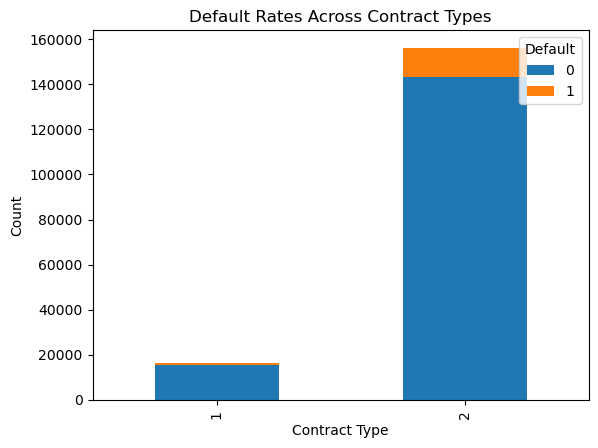

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to pandas DataFrame for plotting
df_application_data_pandas = df_application_data.toPandas()

# Plot 1: Comparing the default rates across contract types by stack bar graph
plt.figure(figsize=(10, 6))
df_application_data_pandas.groupby(['contract_type', 'target']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Default Rates Across Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Default', loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

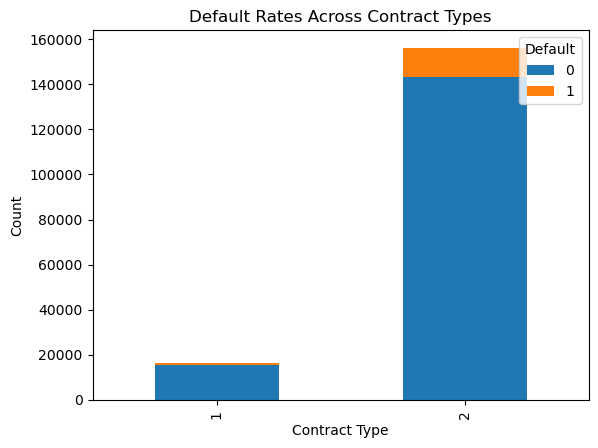

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting the pyspark dataframe that is df_application to pandas so that we can create graphs
df_application_data_pandas = df_application_data.toPandas()

plt.figure(figsize=(10, 6))
df_application_data_pandas.groupby(['contract_type', 'target']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Default Rates Across Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Default', loc='upper right')
plt.show()


This graph shows about the default rates across contract types. we are using types of contracts using the dataframe of application data where we can see that target and contract type to be grouped and used as count t check target group of 1 and 2 in contract type. we can see that group contract type 2 is large comparing to type 1. orange color in the graph is target 1 in the dataframe. so therefore it is recommend to make a graph like this to distinguish the difference using the contract type and target

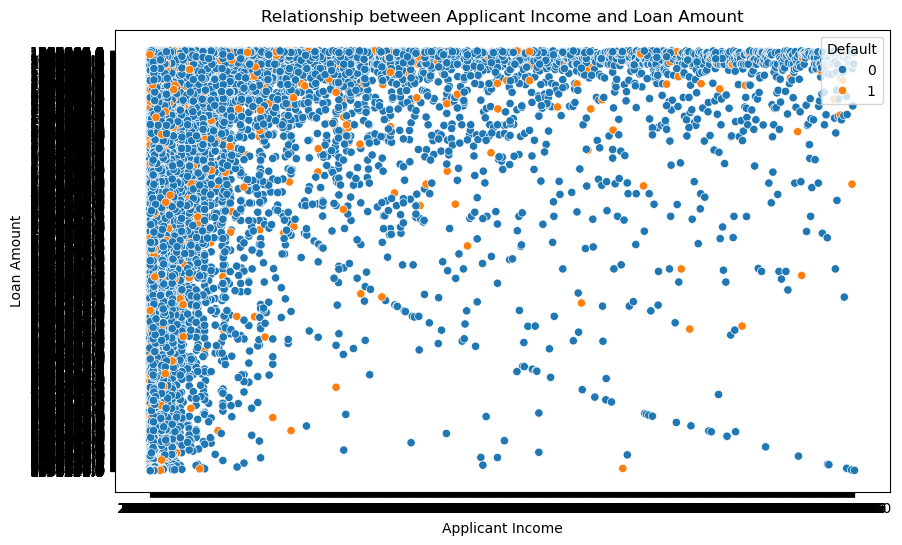

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_application_data_pandas, x='income_total', y='amt_credit', hue='target')
plt.title('Relationship between Applicant Income and Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Default', loc='upper right')
plt.show()

This graph shows about relationship between applicant income and loan amount. in this graph we are using scatterplot to depict the applicant income using the application dataframe using the applicant's income total and comparing with the loan amount they have also have used the target column so that we can depict the applicant target type in the graph.

## Part 2. Feature extraction and ML training <a class="anchor" name="part-2"></a>
In this section, you are only allowed to use PySpark DataFrame functions and ML packages for data preparation, model building, and evaluation. Other ML packages, such as scikit-learn, would receive zero marks. Excessive usage of Spark SQL is discouraged.
### 2.1 Discuss the feature selection and prepare the feature columns

2.1.1 Based on the data exploration from 1.2 and considering the use case, discuss the importance of those features. (For example, which features may be useless and should be removed, which feature has a great impact on the label column, which should be transformed) Which features you are planning to use? Discuss the reasons for selecting them and how you create/transform them
- 300 words max for the discussion
- Feel free to add/remove features based on your exploration

In the part 2.1 we have transformed following columns into new feature columns 
1) loan_to_income_ratio
2) age_bucket
3) credit_worthiness
4) num_of_prev_app
5) num_of_approved_app
6) total_credit
7) total_credit_to_income_ratio
8) changing the string column in value_dict dataframe in the category column (education_type, occupation_type, income_type and family_status)

Now i am planning to remove age and credit worthiness from the feature since it is useless to be in dataframe

2.1.2 Write code to create/transform the columns based on your discussion above. 


In [32]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

# Convert categorical columns to numerical using StringIndexer
indexer_age_bucket = StringIndexer(inputCol="age_bucket", outputCol="age_bucket_index")
indexer_credit_worthiness = StringIndexer(inputCol="credit_worthiness", outputCol="credit_worthiness_index")

# Convert numerical categorical columns to one-hot encoded vectors
encoder = OneHotEncoder(inputCols=["age_bucket_index", "credit_worthiness_index"],
                        outputCols=["age_bucket_encoded", "credit_worthiness_encoded"])

# Define feature columns including the encoded categorical columns
feature_cols = ['loan_to_income_ratio', 'age_bucket_encoded', 'credit_worthiness_encoded', 'num_of_prev_app', 'num_of_approved_application']


### 2.2 Preparing Spark ML Transformers/Estimators for features, labels, and models  <a class="anchor" name="2.2"></a>

2.2.1 Write code to create Transformers/Estimators for transforming/assembling the columns you selected above in 2.1, and create ML model Estimators for Random Forest (RF) and Gradient-boosted tree (GBT) model.  
**Please DO NOT fit/transform the data yet**

In [41]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
# Define feature columns and VectorAssembler
feature_cols = ['loan_to_income_ratio', 'age_bucket', 'credit_worthiness', 'num_of_prev_app', 'num_of_approved_application']

2.2.2 Write code to include the above Transformers/Estimators into two pipelines(RF and GBT).
**Please DO NOT fit/transform the data yet**

In [42]:
# Define Transformers/Estimators for assembling features
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Define ML model Estimators for Random Forest (RF) and Gradient-boosted tree (GBT) model
rf_classifier = RandomForestClassifier(labelCol="target", featuresCol="features", numTrees=10)
gbt_classifier = GBTClassifier(labelCol="target", featuresCol="features", seed=42)

### 2.3 Prepare, Train and Evaluate models  
2.3.1 Write code to split the data for training and testing purposes. (Note: if the dataset is too large for your machine to train, sampling/sub-sampling is allowed.)

In [43]:
from pyspark.ml import Pipeline

# Define RF pipeline
rf_pipeline = Pipeline(stages=[vector_assembler, rf_classifier])

# Define GBT pipeline
gbt_pipeline = Pipeline(stages=[vector_assembler, gbt_classifier])

2.3.2 Write code to use the corresponding ML Pipelines to train the models on the training data. And then use the trained models to predict the testing data from 2.3.

In [44]:
train, test = df_application_data.randomSplit([0.7, 0.3], seed=2020)

2.4.2 For both models(RF and GBT) and testing data, write code to display the count of TP/TN/FP/FN. Compute the AUC, accuracy, recall, and precision for the above-threshold/below-threshold label from each model testing result using pyspark MLlib/ML APIs.
1. Draw an ROC plot.
2. Discuss which one is the better model and use metrics to support your claim (no word limit, please keep it concise)

In [ ]:
# Fit RF and GBT models
rf_model = rf_pipeline.fit(train)
gbt_model = gbt_pipeline.fit(train)

# Predictions on test data
rf_predictions = rf_model.transform(test)
gbt_predictions = gbt_model.transform(test)

### Part 3. Applicant Segmentation and Knowledge sharing with K-Mean <a class="anchor" name="part-3"></a>  
Please see the specification for this task and add code/markdown cells.
1. Utilize K-Mean clustering/hyperparameter tuning you have learned in this unit and try to find the optimal K value and train the model.
2. Based on your trained model parameters, make recommendations on how to segment the applicants. Write a paragraph with 300 words maximum.

### Part 4: Data Ethics, Privacy, and Security <a class="anchor" name="part-4"></a>  


Data Ethics

It refers to the ethics where the organizations protect, gather and use their data. this field focuses on more of responsibility in other words more of accountability that companies will have when they are collecting data from customers or anywhere.In this world the data is everywhere.These data can be very ubiquitous or even valuable to the companies.
The companies should look into 5 principles of big data according to harvard business school that entities can look into are as follows:
1) ownership 
2) transparency
3) privacy
4) intention
5) outcomes

Privacy

Big data privacy refers to the term where the big data is handle in proper way to reduce risk and safeguard sensitive information. These standard have some privacy methods that are not be able to meet the requirement of privacy suhc as scale and velocity which is really required for big data as it is consists of massive and complex datasets which is there in database.

Security 

Big data securits refers to the collections of security instrucments that used for protecting the analytics and data processing for bigh data.It is mostly needed for theft, cyber attacks and other activties that could impact negatively on the companies 

Investigate regulations and laws that govern data privacy such as GDPR

The world's strictest privacy and security legislation is called the General Data Protection Regulation (GDPR). Despite having been prepared and approved by the EU, it imposes duties on organisations worldwide, provided that they target or gather data pertaining to individuals within the EU. The rule becomes operative on May 25, 2018. If someone violates the GDPR's security and privacy requirements, they might face fines of up to tens of millions of euros.
Scope of the GDPR: 
In theory, all automated processing of personal data, as well as some manual processing in certain circumstances, is covered by the General Data Protection Regulation. Any information pertaining to a recognised or identifiable natural person is considered personal data.


## References:
Please add your references below:

https://www.datacamp.com/blog/introduction-to-data-ethics - data ethics defination 

https://blog.hurree.co/the-ethics-of-big-data - big data ethics

https://online.hbs.edu/blog/post/data-ethics - data ethics

https://www.techtarget.com/whatis/definition/General-Data-Protection-Regulation-GDPR -GDPR Rules and Regulations

https://www.imy.se/en/organisations/data-protection/this-applies-accordning-to-gdpr/the-purposes-and-scope-of-gdpr/#:~:text=The%20General%20Data%20Protection%20Regulation%20applies%20in%20principle%20to%20all,identified%20or%20identifiable%20natural%20person.- GDPR Scope

https://journalofbigdata.springeropen.com/articles/10.1186/s40537-016-0059-y - Data Privacy

https://www.sisense.com/glossary/big-data-security/ - Big Data Security

for assignments reference:

http://127.0.0.1:5202/notebooks/Lab/FIT5202%20-%20Week05%20-%20Transformer%2C%20Estimator%20and%20Pipeline%20solution.ipynb - Week 05 

http://127.0.0.1:5202/notebooks/Lab/Week7_Part%20A%20-%20K-Means%20Clustering%20sample%20solution.ipynb - Kmeans 

http://127.0.0.1:5202/notebooks/Lab/Week6_Classification%20Algorithms%20sample%20solution.ipynb - Classification Algorthims

http://127.0.0.1:5202/notebooks/Lab/FIT5202%20-%20Week05%20-%20Transformer%2C%20Estimator%20and%20Pipeline%20solution.ipynb - Transformer, estimators and pipeline

http://127.0.0.1:5202/notebooks/Lab/FIT5202%20-%20Parallel%20Search%20.ipynb - Parallel Search

http://127.0.0.1:5202/notebooks/Lab/FIT5202%20-%20Parallel%20Joins.ipynb - Parallel Join

http://127.0.0.1:5202/notebooks/Lab/FIT5202%20-%20Parallel%20Aggregation-SOLUTION.ipynb - Parallel Aggregation

http://127.0.0.1:5202/notebooks/Lab/Session8_Collaborative%20Filtering%20sample%20solution.ipynb - Hypermeter